## Exploring Trey Hendrickons statistics from NFLVerse and Pro Football Focus

As of March 2024 the Cincinnati Bengals have allowed Trey Hendrickson to seek a trade elsewhere in the league. This comes soon after Maxx Crosby signed a [contract](https://www.nfl.com/news/raiders-sign-maxx-crosby-three-year-106-million-extension-highest-paid-non-qb) making him the highest paid non-QB. On paper does Trey have an argument that he should perhaps be paid more than that? 

Of course statistics can only capture so much. There are intangibles to a player and not all on field production can be tied to a statistic. ProFootballFocus takes those things into account and has ranked Trey as the 10th best DE in the league. Let's see what the stats say though.

In [74]:
import pandas as pd
import seaborn as sns
import sys
import matplotlib.pyplot as plt

sys.path.append("../..")

from utils import get_def_player_stats, get_players_info

df = get_def_player_stats(2024)
df.head()

,season,week,season_type,player_id,player_name,player_display_name,position,position_group,headshot_url,team,...,def_pass_defended,def_tds,def_fumbles,def_fumble_recovery_own,def_fumble_recovery_yards_own,def_fumble_recovery_opp,def_fumble_recovery_yards_opp,def_safety,def_penalty,def_penalty_yards
0,2024,1,REG,00-0023853,M.Prater,Matt Prater,K,SPEC,https://static.www.nfl.com/image/upload/f_auto...,ARI,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,0.0
1,2024,5,REG,00-0026158,J.Flacco,Joe Flacco,QB,QB,https://static.www.nfl.com/image/upload/f_auto...,JAX,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
2,2024,1,REG,00-0026190,C.Campbell,Calais Campbell,DE,DL,https://static.www.nfl.com/image/upload/f_auto...,MIA,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
3,2024,2,REG,00-0026190,C.Campbell,Calais Campbell,DE,DL,https://static.www.nfl.com/image/upload/f_auto...,MIA,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
4,2024,3,REG,00-0026190,C.Campbell,Calais Campbell,DE,DL,https://static.www.nfl.com/image/upload/f_auto...,MIA,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0


In [75]:
TOP_TEN_DEs = [
    "Aidan Hutchinson",
    "Myles Garrett",
    "T.J. Watt",
    "Nick Bosa",
    "Khalil Mack",
    "Micah Parsons",
    "Jared Verse",
    "Alex Highsmith",
    "Will Anderson",
    "Trey Hendrickson",
]

top_10_df = (
    df[(df["season_type"] == "REG") & (df["player_display_name"].isin(TOP_TEN_DEs))]
    .groupby(["player_id"])
    .agg(
        {
            "player_display_name": "max",
            "week": "count",
            "team": "max",
            "def_tackles": "sum",
            "def_tackles_for_loss": "sum",
            "def_tackles_for_loss_yards": "sum",
            "def_sacks": "sum",
            "def_qb_hits": "sum",
        }
    )
)

# Rank the raw categories
top_10_df["def_tackle_rank"] = top_10_df["def_tackles"].rank(ascending=False)
top_10_df["def_tackles_for_loss_rank"] = top_10_df["def_tackles_for_loss"].rank(
    ascending=False
)
top_10_df["def_sacks_rank"] = top_10_df["def_sacks"].rank(ascending=False)
top_10_df["def_qb_hits_rank"] = top_10_df["def_qb_hits"].rank(ascending=False)
top_10_df["def_avg_rank"] = top_10_df[
    [
        "def_tackle_rank",
        "def_tackles_for_loss_rank",
        "def_sacks_rank",
        "def_qb_hits_rank",
    ]
].mean(axis=1)
top_10_df[
    [
        "player_display_name",
        "def_tackle_rank",
        "def_tackles_for_loss_rank",
        "def_sacks_rank",
        "def_qb_hits_rank",
        "def_avg_rank",
    ]
]

,player_display_name,def_tackle_rank,def_tackles_for_loss_rank,def_sacks_rank,def_qb_hits_rank,def_avg_rank
player_id,,,,,,
00-0031040,Khalil Mack,9.0,10.0,8.5,9.0,9.125
00-0033868,Myles Garrett,1.5,1.0,2.0,2.0,1.625
00-0033886,T.J. Watt,1.5,2.5,4.0,3.0,2.750
00-0033935,Trey Hendrickson,4.5,2.5,1.0,1.0,2.250
00-0035717,Nick Bosa,4.5,5.0,6.0,4.0,4.875
00-0036333,Alex Highsmith,7.0,8.0,8.5,10.0,8.375
00-0036932,Micah Parsons,6.0,6.0,3.0,5.0,5.000
00-0037236,Aidan Hutchinson,10.0,9.0,7.0,8.0,8.500
00-0039108,Will Anderson,8.0,4.0,5.0,6.0,5.750


In [76]:
# Try a Pandas Styled Table
from utils import style_rankings

colnames = {
    "player_display_name": "Player",
    "def_tackle_rank": "Tackles",
    "def_tackles_for_loss_rank": "Tackles For Loss",
    "def_sacks_rank": "Sacks",
    "def_qb_hits_rank": "QB Hits",
}
top_10_df.sort_values("def_avg_rank")[
    [
        "player_display_name",
        "def_tackle_rank",
        "def_tackles_for_loss_rank",
        "def_sacks_rank",
        "def_qb_hits_rank",
    ]
].style.pipe(style_rankings, "Defensive End Rankings 2024", colnames)

Player,Tackles,Tackles For Loss,Sacks,QB Hits
Myles Garrett,1.5,1.0,2.0,2.0
Trey Hendrickson,4.5,2.5,1.0,1.0
T.J. Watt,1.5,2.5,4.0,3.0
Nick Bosa,4.5,5.0,6.0,4.0
Micah Parsons,6.0,6.0,3.0,5.0
Will Anderson,8.0,4.0,5.0,6.0
Jared Verse,3.0,7.0,10.0,7.0
Alex Highsmith,7.0,8.0,8.5,10.0
Aidan Hutchinson,10.0,9.0,7.0,8.0
Khalil Mack,9.0,10.0,8.5,9.0


Trey Hendrickson is definitely towards the top of the pack especially in the passing game which is consistent with what we've seen all year. Not everyone in this list played all season, though. Aidan Hutchinson for example was injured in week 6 and was the top rated DE by PFF. 

In [77]:
# Let's see how many weeks each player played in 2024
top_10_df[['player_display_name', 'team', 'week']]

,player_display_name,team,week
player_id,,,
00-0031040,Khalil Mack,LAC,15
00-0033868,Myles Garrett,CLE,15
00-0033886,T.J. Watt,PIT,16
00-0033935,Trey Hendrickson,CIN,17
00-0035717,Nick Bosa,SF,13
00-0036333,Alex Highsmith,PIT,11
00-0036932,Micah Parsons,DAL,13
00-0037236,Aidan Hutchinson,DET,5
00-0039108,Will Anderson,HOU,13


We could divide the statistics by number of weeks, but PFF provides the snap count by pass, rush, and special teams plays. So let's use those instead.

In [78]:
NUMBER_OF_SNAPS = {
    "Aidan Hutchinson": {"pass": 198, "rush": 77},
    "Alex Highsmith": {"pass": 321, "rush": 237},
    "Jared Verse": {"pass": 546, "rush": 356},
    "Khalil Mack": {"pass": 419, "rush": 232},
    "Micah Parsons": {"pass": 427, "rush": 243},
    "Myles Garrett": {"pass": 477, "rush": 328},
    "Nick Bosa": {"pass": 420, "rush": 267},
    "T.J. Watt": {"pass": 599, "rush": 370},
    "Trey Hendrickson": {"pass": 514, "rush": 273},
    "Will Anderson": {"pass": 418, "rush": 217},
}

top_10_df = top_10_df.sort_values("player_display_name")
top_10_df["pass_snaps"] = [v.get("pass") for _, v in NUMBER_OF_SNAPS.items()]
top_10_df["rush_snaps"] = [v.get("rush") for _, v in NUMBER_OF_SNAPS.items()]

# Calculate the stats per snap
# Tackles and TFL are classified as a running play
# Sacks and QB Hits are assumed to be a passing play
# Coverage snaps were not counted as DEs are mostly not a coverage position though some schemes do use them that way
# (All snap data is from PFF)
top_10_df["def_tackles_ps"] = top_10_df["def_tackles"] / top_10_df["rush_snaps"]
top_10_df["def_tackles_for_loss_ps"] = (
    top_10_df["def_tackles_for_loss"] / top_10_df["rush_snaps"]
)
top_10_df["def_sacks_ps"] = top_10_df["def_sacks"] / top_10_df["pass_snaps"]
top_10_df["def_qb_hits_ps"] = top_10_df["def_qb_hits"] / top_10_df["pass_snaps"]

# Calculate the ranks for each ps stat
top_10_df["def_tackles_ps_rank"] = top_10_df["def_tackles_ps"].rank(ascending=False)
top_10_df["def_tackles_for_loss_ps_rank"] = top_10_df["def_tackles_for_loss_ps"].rank(
    ascending=False
)
top_10_df["def_sacks_ps_rank"] = top_10_df["def_sacks_ps"].rank(ascending=False)
top_10_df["def_qb_hits_ps_rank"] = top_10_df["def_qb_hits_ps"].rank(ascending=False)

# Add the average ranking column for sorting
top_10_df["def_avg_ps_rank"] = top_10_df[
    [
        "def_tackles_ps_rank",
        "def_tackles_for_loss_ps_rank",
        "def_sacks_ps_rank",
        "def_qb_hits_ps_rank",
    ]
].mean(axis=1)

Now let's take a look at rankings table using per snap statistics.

In [79]:
colnames = {
    "player_display_name": "Player",
    "def_tackles_ps_rank": "Tackles",
    "def_tackles_for_loss_ps_rank": "Tackles For Loss",
    "def_sacks_ps_rank": "Sacks",
    "def_qb_hits_ps_rank": "QB Hits",
}
top_10_df.sort_values("def_avg_ps_rank")[
    [
        "player_display_name",
        "def_tackles_ps_rank",
        "def_tackles_for_loss_ps_rank",
        "def_sacks_ps_rank",
        "def_qb_hits_ps_rank",
    ]
].style.pipe(style_rankings, "Defensive End Rank Per Snap 2024", colnames)

Player,Tackles,Tackles For Loss,Sacks,QB Hits
Aidan Hutchinson,1.0,1.0,1.0,1.0
Trey Hendrickson,6.0,3.0,2.0,2.0
Myles Garrett,5.0,4.0,3.0,3.0
Will Anderson,2.0,2.0,5.0,6.0
Nick Bosa,3.0,5.0,6.0,4.0
Micah Parsons,4.0,7.0,4.0,5.0
T.J. Watt,8.0,6.0,7.0,7.0
Alex Highsmith,7.0,8.0,8.0,8.0
Jared Verse,9.0,9.0,10.0,10.0
Khalil Mack,10.0,10.0,9.0,9.0


Trey Hendrickson still ranks near the top of the table based on 2024 per snap statistics. Based on statistics alone it might make sense to pay Trey as a top defensive end, but there are many other considerations that we could explore:

- How much if any does defensive end production tend to fall off at Trey's age.
- Some have claimed that if Trey had more of a peer on the other side of the line that he'd have even more sacks. Is there a way to assess that with the statistics available?
- Does Trey tend to face easier/tougher competition than other ends in the league?

In [80]:
# Track how statistics trend by playing year as DE

de_df = get_def_player_stats(list(range(2005, 2025)))
de_df["position"].head()
de_df = (
    de_df[(de_df["position"] == "DE") & (de_df["season_type"] == "REG")]
  
)
de_df = de_df.rename(columns={"week": "games"})
print(de_df.size)
de_df

905536


,season,games,season_type,player_id,player_name,player_display_name,position,position_group,headshot_url,team,...,def_pass_defended,def_tds,def_fumbles,def_fumble_recovery_own,def_fumble_recovery_yards_own,def_fumble_recovery_opp,def_fumble_recovery_yards_opp,def_safety,def_penalty,def_penalty_yards
225,2005,1,REG,00-0002090,None,John Browning,DE,DL,None,KC,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
226,2005,3,REG,00-0002090,None,John Browning,DE,DL,None,KC,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
227,2005,4,REG,00-0002090,None,John Browning,DE,DL,None,KC,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
228,2005,6,REG,00-0002090,None,John Browning,DE,DL,None,KC,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
229,2005,7,REG,00-0002090,None,John Browning,DE,DL,None,KC,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9893,2024,5,REG,00-0039900,M.Kneeland,Marshawn Kneeland,DE,DL,https://static.www.nfl.com/image/upload/f_auto...,DAL,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
9894,2024,14,REG,00-0039900,M.Kneeland,Marshawn Kneeland,DE,DL,https://static.www.nfl.com/image/upload/f_auto...,DAL,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
9895,2024,15,REG,00-0039900,M.Kneeland,Marshawn Kneeland,DE,DL,https://static.www.nfl.com/image/upload/f_auto...,DAL,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0.0,0.0
9896,2024,16,REG,00-0039900,M.Kneeland,Marshawn Kneeland,DE,DL,https://static.www.nfl.com/image/upload/f_auto...,DAL,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0


/var/folders/4b/7v01nk757qsbhc05_11mrdnr0000gn/T/ipykernel_23493/1031662612.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  de_with_year_df["nth_season"] = (


<Axes: xlabel='nth_season', ylabel='Count'>

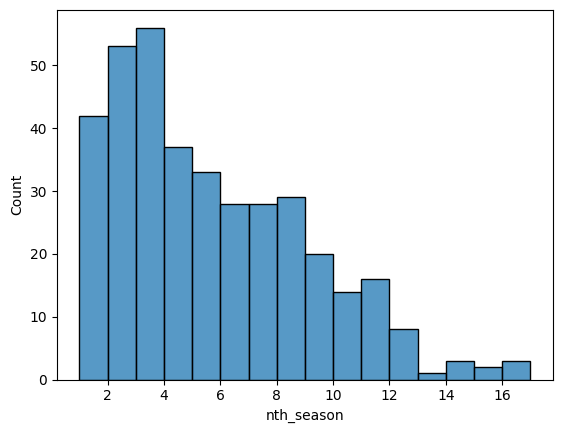

In [81]:
# Plot histogram of number of seasons each player has played in the dataset
players_df = get_players_info()

de_df["entry_year"] = de_df["player_id"].map(
    players_df.set_index("gsis_id")["entry_year"], na_action="ignore"
)
de_with_year_df = de_df[de_df["entry_year"].notna()]

# TODO - gives warning... not sure if a problem
de_with_year_df["nth_season"] = (
    de_with_year_df["season"] - de_with_year_df["entry_year"] + 1
)
max_nth_season_by_player = de_with_year_df.groupby(["player_id"])["nth_season"].max()
sns.histplot(max_nth_season_by_player, binwidth=1)

Most of the players in this date range have played less than 8 years. This is to be expected. If I want to track how well players perform from season to season and see how it goes as they get into their 8th, 9th, etc. I think I should only include players who have played at least 8 seasons as Trey Hendrickson is entering his ninth season and I want to see how production tends to go from there. This will eliminate noise with backup players or solid players who tend to retire early vs the all-pros who have long careers. 

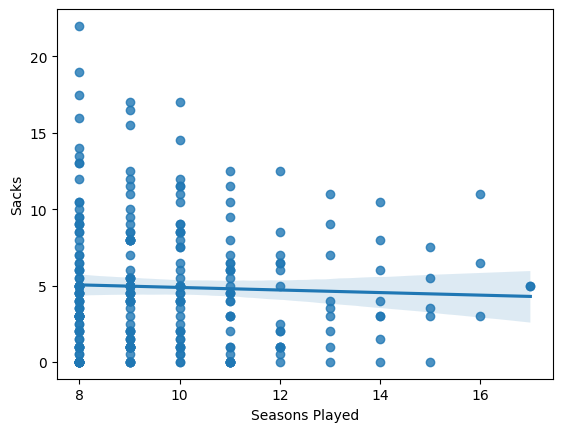

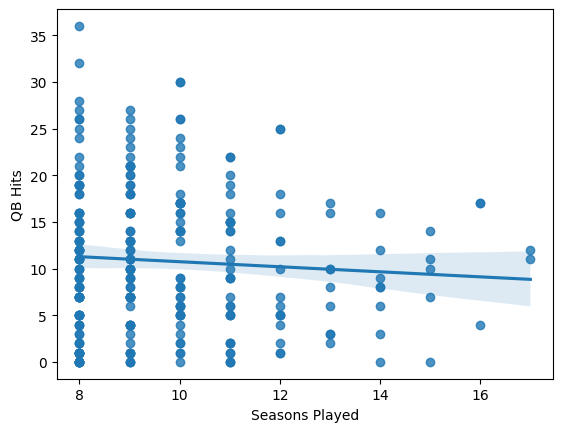

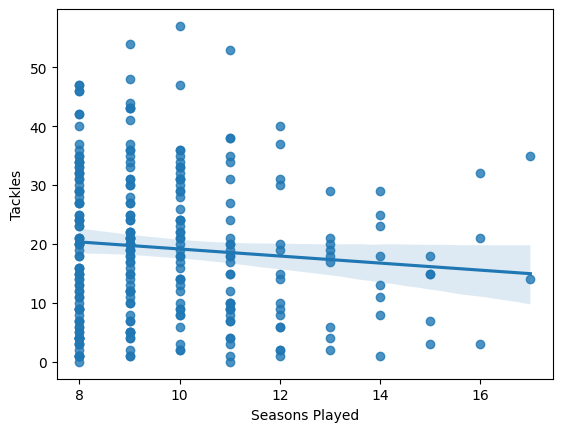

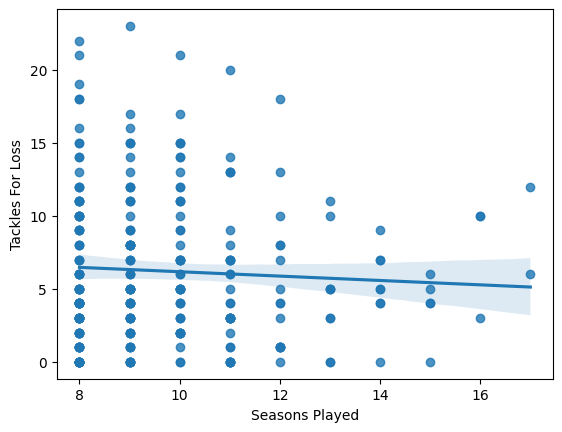

In [82]:
seasoned_df = de_with_year_df[de_with_year_df["nth_season"] > 7]

grouped_seasoned_df = seasoned_df.groupby(["player_id", "season"]).agg(
    {
        "player_display_name": "max",
        "nth_season": "max",
        "def_sacks": "sum",
        "def_tackles": "sum",
        "def_tackles_for_loss": "sum",
        "def_qb_hits": "sum",
    }
)

# Get axes so they plot in separate graphs
fig1, sacks_ax = plt.subplots()
fig2, qb_hits_ax = plt.subplots()
fig3, tackles_ax = plt.subplots()
fig4, tfl_ax = plt.subplots()

# Generate plots
sacks_ax = sns.regplot(
    x="nth_season", y="def_sacks", data=grouped_seasoned_df, ax=sacks_ax
)
qb_hits_ax = sns.regplot(
    x="nth_season", y="def_qb_hits", data=grouped_seasoned_df, ax=qb_hits_ax
)
tackles_ax = sns.regplot(
    x="nth_season", y="def_tackles", data=grouped_seasoned_df, ax=tackles_ax
)
tfl_ax = sns.regplot(
    x="nth_season", y="def_tackles_for_loss", data=grouped_seasoned_df, ax=tfl_ax
)

# Set labels
sacks_ax.set(xlabel="Seasons Played", ylabel="Sacks")
qb_hits_ax.set(xlabel="Seasons Played", ylabel="QB Hits")
tackles_ax.set(xlabel="Seasons Played", ylabel="Tackles")
tfl_ax.set(xlabel="Seasons Played", ylabel="Tackles For Loss")

# Show it
plt.show()